In [59]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
colors = sns.color_palette('deep')[0:4]

### Data integration  

____La data intégration à consisté pour nous à assembler les differentes sources de données de sorte à faciliter le nettoyage, la transformation des variables et les analyses descriptives qui suivront.___

***Pourquoi nous autoriser à assembler les données ?***    
Independamment de toute relation statistique entre les differents datasets, on cherche à entrainer un modèle le plus fiable possible qui prendra en compte toute les caractéristiques presente dans chacun les datasets. Par consequent, la solution la plus évidente est de rassembler le datasets et aussi puisqu'elles ont les mêmes variables.

In [2]:

FOLDER_2113 = '2113'
FOLDER_2213 = '2213'
FOLDER_3113 =  '3113'
FOLDER_3213 = '3213'

def merge_csv(folder, file_directory='./données/'):
    """
    
    """
    list_files = os.listdir(file_directory + folder)
    list_files = [file_directory + folder+'/'+file for file in list_files]

    df = pd.DataFrame()
    for file in sorted(list_files):
        df = pd.concat([df, pd.read_csv(file, delimiter=';', header=None)], ignore_index=True)
    
    return df

def loop_data_folder(dossier):
    folder_df = merge_csv(dossier)
    return folder_df

In [3]:
folder_2113_df = loop_data_folder(FOLDER_2113)

In [4]:
folder_2213_df = loop_data_folder(FOLDER_2213)

In [5]:
folder_3213_df = loop_data_folder(FOLDER_3213)

In [6]:
folder_3113_df = loop_data_folder(FOLDER_3113)

In [7]:
folder_3113_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,XML100_3113_01,25583,192.71,93.57,0.09,0.05,919.54,267.95,0,712.15,0.36,0.14,1207.08,0.26,0.13,0.01,566.01,471.01,0.61,5.17
1,XML100_3113_01,25562,150.78,69.22,0.07,0.04,938.85,271.54,0,685.38,0.34,0.14,1167.08,0.27,0.13,0.03,566.74,477.14,1.07,5.92
2,XML100_3113_01,25604,214.45,174.85,0.09,0.05,905.85,279.55,0,750.85,0.38,0.16,1214.69,0.26,0.13,0.01,653.60,464.37,0.61,5.04
3,XML100_3113_01,25376,153.46,79.16,0.07,0.04,928.23,268.95,0,690.85,0.35,0.15,1162.15,0.26,0.13,0.01,564.77,471.98,0.72,5.61
4,XML100_3113_01,25532,164.53,74.77,0.09,0.07,931.54,283.95,0,692.38,0.35,0.14,1195.62,0.26,0.13,0.02,589.66,472.96,0.82,5.28


In [8]:
final_dataset = pd.concat([folder_2113_df, folder_2213_df,folder_3113_df, folder_3213_df], ignore_index=True)

In [9]:
final_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,XML100_2113_01,13063,257.77,105.04,0.21,0.08,534.20,133.20,0,294.40,0.23,0.15,446.50,0.21,0.10,0.02,327.90,482.08,1.61,3.60
1,XML100_2113_01,13237,201.78,57.71,0.16,0.03,576.70,74.85,0,302.60,0.23,0.17,420.30,0.21,0.11,0.03,187.52,489.23,1.79,4.11
2,XML100_2113_01,13168,225.72,114.30,0.17,0.06,552.80,112.23,0,279.40,0.21,0.16,430.80,0.21,0.10,0.02,307.32,484.54,1.55,3.76
3,XML100_2113_01,13168,243.31,164.78,0.21,0.12,539.60,157.22,0,297.60,0.25,0.15,432.20,0.36,0.18,0.27,403.13,467.49,3.00,3.52
4,XML100_2113_01,13000,195.33,102.78,0.16,0.10,563.70,79.74,0,294.20,0.23,0.17,416.40,0.21,0.10,0.02,213.56,490.17,1.61,3.95


In [10]:
final_dataset.shape

(14109514, 20)

### Data cleaning et data transformation

Dans cette partie nous nous sommes assurés que nos données pourraient être utilisées pour la suite (analyse descriptive et modèle de machine learning). Nous avons particulerement vérifier l'abscence de données manquantes et les valeurs nulles. Ensuite nous avons rénommé les colonnes pour qu'elles paraissent plus significatives. Nous avons aussi rénommé les differentes configuration pour facilité les visualisations par la suite. Nous nous sommes que les types des differentes variables étaient correctes.

- recherche valeurs manquantes

In [11]:
print("Nombre de valeurs manquantes : ", final_dataset.isna().sum().sum())

Nombre de valeurs manquantes :  0


In [12]:
final_dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

Il nous faudra renomer dans les étapes de data transfomation les colonnes. Mais, nous commencerons par supprimer la neuvième colonnes de notre dataset parceque elle contient des valeurs nulles. 

In [13]:
final_dataset.drop(8, axis=1, inplace=True)

In [14]:
final_dataset.tail()

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19
14109509,XML100_3213_26,20985,235.66,273.26,0.09,0.11,948.20,136.97,848.80,0.41,0.07,1594.60,0.21,0.11,0.03,491.50,329.40,1.90,4.85
14109510,XML100_3213_26,20985,218.94,210.92,0.09,0.11,973.90,125.24,850.20,0.41,0.08,1612.20,0.22,0.11,0.05,375.58,336.71,2.19,5.06
14109511,XML100_3213_26,20985,220.86,239.97,0.10,0.13,965.30,152.99,848.70,0.41,0.07,1586.50,0.36,0.18,0.27,466.11,363.05,3.00,4.45
14109512,XML100_3213_26,20985,157.27,144.87,0.04,0.03,973.80,113.14,865.50,0.41,0.05,1659.10,0.36,0.18,0.27,307.62,394.84,3.00,4.08
14109513,XML100_3213_26,20985,135.73,112.42,0.03,0.02,986.10,108.73,849.40,0.41,0.06,1648.30,0.36,0.18,0.27,297.74,398.34,3.00,4.33


In [15]:
print("La nouvelle taille de notre dataset est  : " ,final_dataset.shape)

La nouvelle taille de notre dataset est  :  (14109514, 19)


- Renommer les colonnes

In [16]:
new_cols = ['config', 'cout', 'S01','S02','S03','S04','S05','S06','S07','S09','S10','S11','S12','S13','S14','S15','S16','S17','S18']
final_dataset.columns = new_cols
final_dataset.columns

Index(['config', 'cout', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18'],
      dtype='object')

- Reformatage des valeurs de la colonne config    
Est ce que la configuration à un impact sur le coût ? Nous nous proposons d'étudier en analyse uni ou bivariée la variable. Mais avant nous voulons la reformater.

In [17]:
final_dataset['config'] = final_dataset['config'].str.slice(7, 11)
final_dataset.head()

,config,cout,S01,S02,S03,S04,S05,S06,S07,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,2113,13063,257.77,105.04,0.21,0.08,534.20,133.20,294.40,0.23,0.15,446.50,0.21,0.10,0.02,327.90,482.08,1.61,3.60
1,2113,13237,201.78,57.71,0.16,0.03,576.70,74.85,302.60,0.23,0.17,420.30,0.21,0.11,0.03,187.52,489.23,1.79,4.11
2,2113,13168,225.72,114.30,0.17,0.06,552.80,112.23,279.40,0.21,0.16,430.80,0.21,0.10,0.02,307.32,484.54,1.55,3.76
3,2113,13168,243.31,164.78,0.21,0.12,539.60,157.22,297.60,0.25,0.15,432.20,0.36,0.18,0.27,403.13,467.49,3.00,3.52
4,2113,13000,195.33,102.78,0.16,0.10,563.70,79.74,294.20,0.23,0.17,416.40,0.21,0.10,0.02,213.56,490.17,1.61,3.95


In [18]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14109514 entries, 0 to 14109513
Data columns (total 19 columns):
 #   Column  Dtype  
---  ------  -----  
 0   config  object 
 1   cout    int64  
 2   S01     float64
 3   S02     float64
 4   S03     float64
 5   S04     float64
 6   S05     float64
 7   S06     float64
 8   S07     float64
 9   S09     float64
 10  S10     float64
 11  S11     float64
 12  S12     float64
 13  S13     float64
 14  S14     float64
 15  S15     float64
 16  S16     float64
 17  S17     float64
 18  S18     float64
dtypes: float64(17), int64(1), object(1)
memory usage: 2.0+ GB


In [20]:
# export final dataset
#final_dataset.to_csv('final_dataset.csv', index=False)

### Analyse univariée et multivariée

Dans cette section, nous avons essayé de faire parler les variables. Concrètement, nous avons cherché à comprendre les variables et chercher les différentes corrélations entre les variables et entirer des conclusions. Il s'agit d'un succession d'analyse univariée et multivariée.

- Analyse de la variable config

In [21]:
final_dataset.describe(include='object')

,config
count,14109514
unique,4
top,3113
freq,4137693


La configuration 3113 contient a proximativement plus de solution que les autres configurations.    

In [46]:
print(colors)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), (0.9686274509803922, 0.5058823529411764, 0.7490196078431373), (0.6, 0.6, 0.6)]


In [51]:
final_dataset['config'].value_counts().sort_index()

2113    2536722
2213    3302699
3113    4137693
3213    4132400
Name: config, dtype: int64

Text(0.5, 1.0, 'Pourcentage du nombre de solution par configuration')

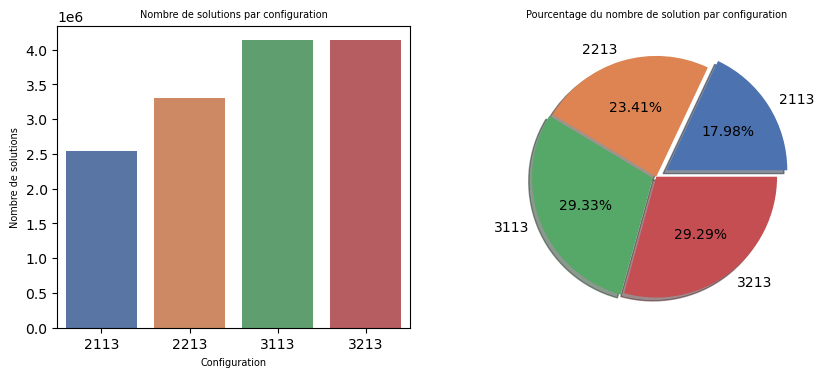

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi=100)

# construction d'un diagramme en bar
palette =  {'2113':colors[0], '2213':colors[1],'3113':colors[2],'3213': colors[3]}
sns.countplot(data=final_dataset, x='config',ax=axes[0], palette=palette)
axes[0].set_title('Nombre de solutions par configuration', fontdict={'fontsize':7})
axes[0].set_ylabel('Nombre de solutions', fontdict={'fontsize':7})
axes[0].set_xlabel('Configuration', fontdict={'fontsize':7})


# construction d'un graphe pie
pie_values = final_dataset['config'].value_counts().sort_index()
labels=['2113', '2213','3113', '3213']
textprops = {"fontsize":15}
explode = [0.1,0,0.03,0]
axes[1].pie(
    pie_values, 
    labels=labels, 
    shadow=True, 
    autopct = "%0.2f%%",
    explode = explode,
    colors= colors
)
axes[1].set_title('Pourcentage du nombre de solution par configuration', fontdict={'fontsize':7})

- Analyse de la variable coût

Les graphes ci dessus nous nombre la contribution de chaque configuration dans notre dataset. Peut être lors de l'entrainement de nos modèles nous devrons penser à équilibrer.

In [23]:
final_dataset['cout'].describe()

count   14109514.00
mean       17237.76
std         5029.22
min         7766.00
25%        12726.00
50%        18408.00
75%        21696.00
max        27588.00
Name: cout, dtype: float64

Text(0.5, 0, 'Coût')

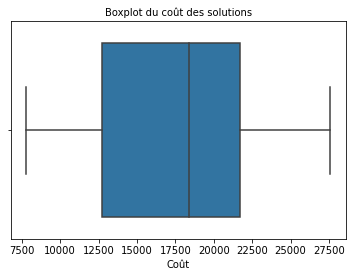

In [27]:
sns.boxplot(x=final_dataset['cout'])
plt.title('Boxplot du coût des solutions', fontdict={'fontsize':10})
plt.xlabel('Coût', fontdict={'fontsize':10})

On observe que :
- Le coût moyen des solution est de 17237.76.
- 25% de nos observations ont un coût compris entre 7766 et 12726
- le coût médian de notre dataset est de 18408.00
- 25% de nos observations ont un coût compris 21696 et 27588



- Etude du coût en fonction des configurations

Text(0.5, 0, 'Configuration')

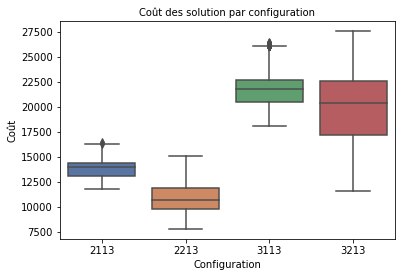

In [61]:
sns.boxplot(data=final_dataset, y='cout', x='config', palette=palette)
plt.title('Coût des solution par configuration', fontdict={'fontsize':10})
plt.ylabel('Coût', fontdict={'fontsize':10})
plt.xlabel('Configuration', fontdict={'fontsize':10})

il est important de remarquer que toutes nos configurations represente des tranches de couts bien differentes. 
- Les configurations avec dépots centrés presente de bons résultats comparé au dépots aux coins.
- Et les clients présents dans les grappes géographiques engendre en génerale des coûts moindres par rapport au client avec des positions totalement aléatoires.


Text(0.5, 1.0, 'Distribution des coûts')

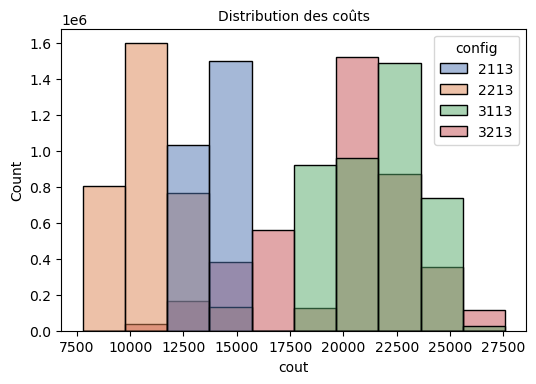

In [62]:
plt.figure(figsize=(6,4), dpi=100)
sns.histplot(data=final_dataset, x='cout',hue='config', bins=10, palette=palette)
plt.title('Distribution des coûts', fontdict={'fontsize':10})

Ce graphique peut nous donner une idée de comment répartir nos classes pour les modèles de classification de façon bien équilibré :
- Le groupe de excellente dont le coût entre 7500 et 12500
- Le groupe de bonne dont le coût entre 12500 et 17500 ( près de la moyenne)
- Le groupe de moyenne dont le coût entre 17500 et 2100 environ
- Le groupe de mauvaise dont le coût entre après 21000

- Etude de l'ecart type de la largeur des tournées par rapport à configuration

Text(0.5, 0, 'Configuration')

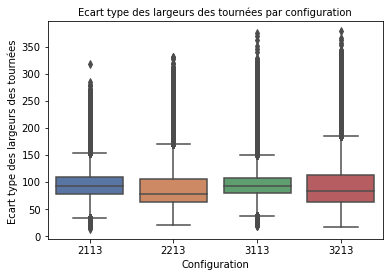

In [63]:
sns.boxplot(data=final_dataset, x='config', y='S02', palette=palette)
plt.title('Ecart type des largeurs des tournées par configuration', fontdict={'fontsize':10})
plt.ylabel('Ecart type des largeurs des tournées ', fontdict={'fontsize':10})
plt.xlabel('Configuration', fontdict={'fontsize':10})

La configuration des instances presente un distribution des écarts type sensiblement pareilles. 

- Etude étude des dépendances entre les autres variables (avec le pairplot et la correlation de pearson)    

In [ ]:
numeric_cols = list(final_dataset.select_dtypes(include=np.number).columns)
len(numeric_cols)

18

Pairplot

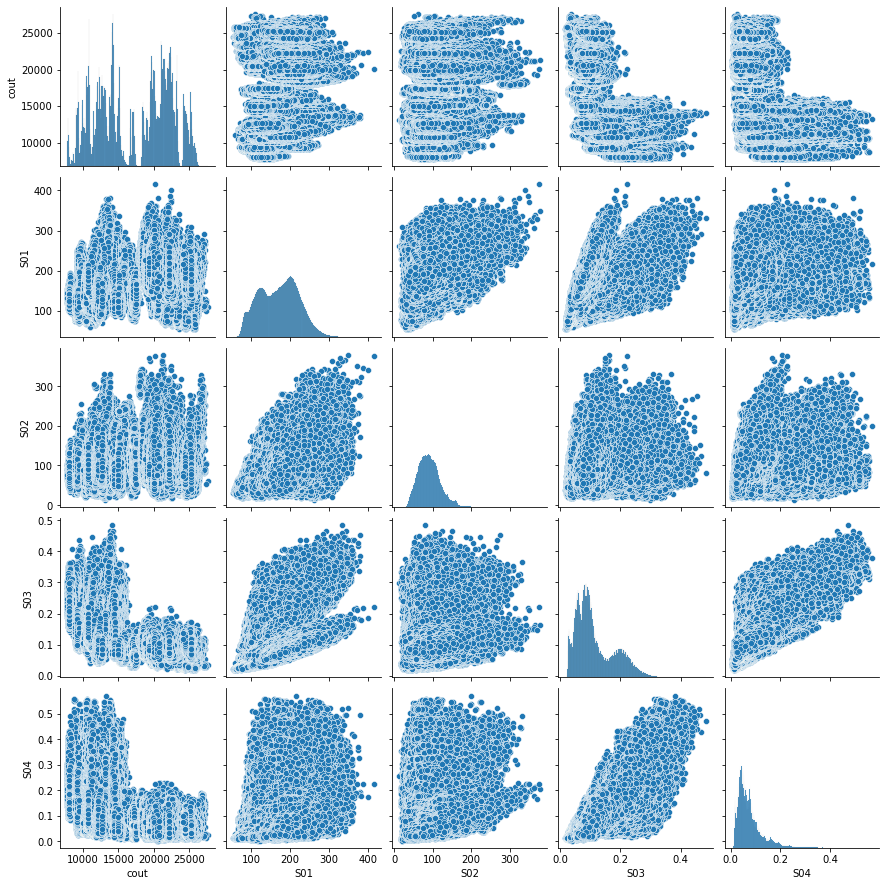

In [ ]:
# pair plot des variables de 1 à 5
sns.pairplot(data=final_dataset[numeric_cols[:5]])

Le pairplot nous donne une idée de rélation qui peuvent exister entre nos differentes variables. Nous utiliserons effectuerons une calcul de correlation pour estimer ses relations.

Correlation de pearson

In [ ]:
corrs = final_dataset[numeric_cols].corr()
matrix = np.triu(corrs)

Text(0.5, 1.0, 'Matrix de correlation des variables de numerique')

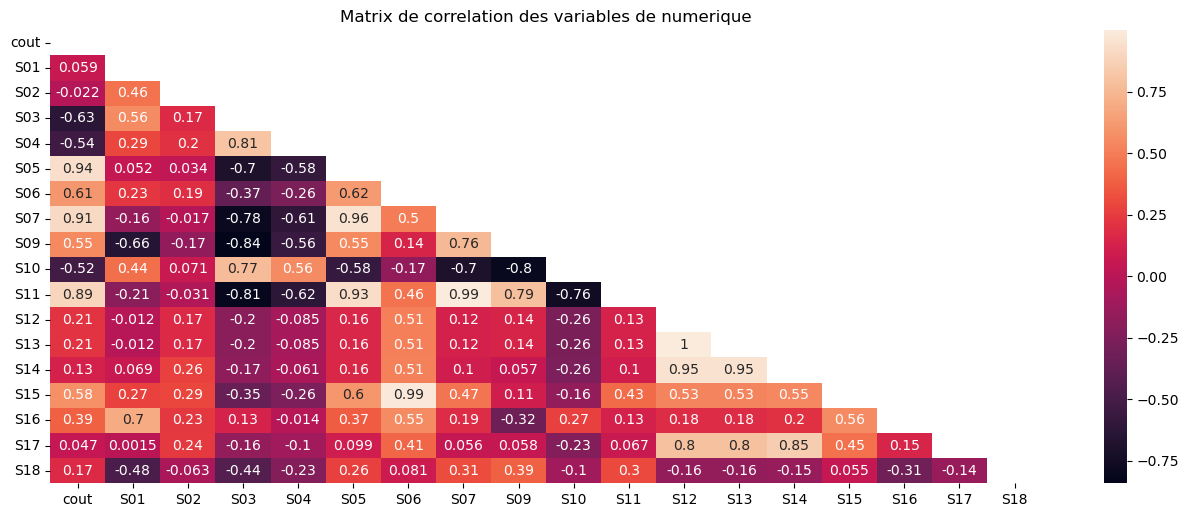

In [ ]:
plt.figure(figsize=(16,6), dpi=100)
sns.heatmap(corrs, annot=True, mask=matrix)
plt.title('Matrix de correlation des variables de numerique')

Plusieurs observations peuvent êtes faites ici :  
- Nous avons des variables predictives qui sont fortement correllées entre elles : 
    - S03 et S11, S03 et S09, S03 et S07, S03 et S04
    - S05 et S11, S05 et S07
    - S06 et S15
    - S07 et S11
    - S12 et S17, S14 et S13
    - S13 et S17, S14
    - S14 et S17    
    
    
- A l'opposée certaines variables sont très faiblements correllées et surtout avec notre variables cible. Il s'agit notamment de S01, S02 et S18.

Ces correllations nous permettrons de retirer certaines variables pour l'entrainement de certains modèles car cela permettra à nos algrotihmes :
1. d'apprendre plus rapidement
2. de facilité l'interpretabilité de nos modèles
3. d'avoir un biais sera moins. 

- Nous pouvons retirer les variables S13 puisque elle est correllé à 1 à la variable S13, S14 puisque correllé à S12 et 13 et contribue faiblement à notre variable cible (coût).
- Nous allons rétirer aussi les variables S15 puisqu'elle est fortement correllé à S06 et et comparé à S06 elle contribue faiblement à notre target.
- Nous pouvons rétirer la variable S11 pour les mêmes raisons que la précedente
- Nous pouvons rétirer la variable S07 pour les mêmes raisons que la précedente

- Retirer les variables correllées entre elles

In [ ]:
def remove_corr_var(dataset, cols_to_remove=['S13', 'S14', 'S15', 'S11', 'S07']):
    output = dataset.drop(cols_to_remove, axis=1)
    return output

#### CONCLUSION DES ETAPES DU HAUT

- Notre dataset est constituer à 29.33% des instances de la configuration 3113 qui represente un dépôts proches d'un coin de la carte avec position de client aléatoire. Toutefois elle represente une tranche de coût plus élévé par rapport aux configurations. Ce qui la rend pas la configuration la plus optimale.
- Les côuts moins sont observé par les configurations caractérisées par un dépots centré. Quand aux grappes géographiques, elle sont caractérisée aussi par des coûts inférieurs comparées aux configurations ou la position des clients est aléatoire.
- En ce qui concerne les rélations entre les variables, nous avons constaté qu'il serait intéressant, pour certaines modèles de retirer une varaible dans chaque pair de variables fortement correllé  puisqu'elles n'influent pas differemment sur le reste des variables.